In [ ]:
!pip install pandas scikit-learn matplotlib

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
!pip install --q kagglehub[pandas-datasets]

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "student-por.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "larsen0966/student-performance-data-set",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

C:\Users\Arya\OneDrive\Documents\Riya\Machine_Learning\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Arya\AppData\Local\Temp\ipykernel_15036\1699142006.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [4]:
# Use only numeric features for this simple regression (G1 and G2 to predict G3)
X = df[['G1', 'G2']]  # Features: 1st and 2nd period grades
y = df['G3']          # Target: final grade


In [5]:
# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# Predict
y_pred = model.predict(X_test)

In [8]:
# Accuracy metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [9]:
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R² Score: 0.86
Mean Squared Error: 1.37


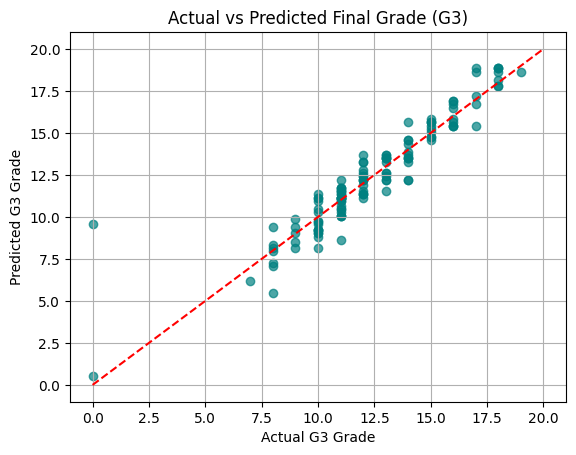

In [10]:
# Plot Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual G3 Grade")
plt.ylabel("Predicted G3 Grade")
plt.title("Actual vs Predicted Final Grade (G3)")
plt.plot([0, 20], [0, 20], 'r--')  # ideal prediction line
plt.grid(True)
plt.show()